# Generating Random Vectors

**Goal: create a normality test, e.g., Jarque-Bera**

[ 0.85024258 -0.05271518 -1.33619481 ... -1.11342762  1.4682635
  1.64971702]


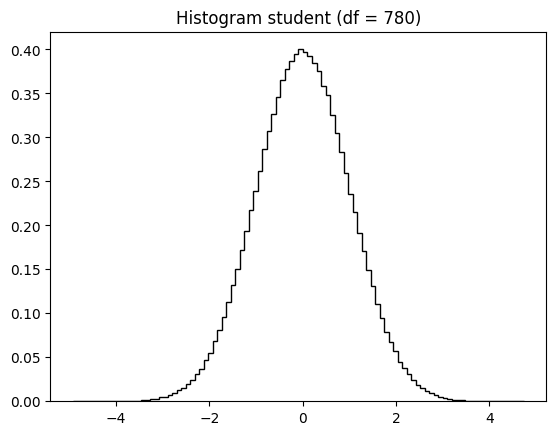

In [83]:
# Step 1: generate random variables

import numpy as np
    
x_size = 10**6 #sample size
dof = 780 # a t-student distribution tends to a normal distribution as dof grow
    
type_random_variable = 'student' #'normal' - 'exponential' - 'chi square'

def plot_hist(x_size, dof, type_random_variable):
    
    if type_random_variable == 'normal':
        x = np.random.standard_normal(x_size)
        x_str = type_random_variable
    elif type_random_variable == 'exponential':
        x = np.random.standard_exponential(x_size)
        x_str = type_random_variable 
    elif type_random_variable == 'student':
        x = np.random.standard_t(size=x_size, df=dof)
        x_str = type_random_variable + ' (df = ' + str(dof) + ')'
    elif type_random_variable == 'chi square':
        x = np.random.chisquare(size=x_size, df=dof)
        x_str = type_random_variable + ' (df = ' + str(dof) + ')'
    
    print(x)
    
    #step 2: visualize histogram
    
    import matplotlib.pyplot as plt
    plt.figure()
    plt.hist(x, bins=100, edgecolor = 'black', histtype='step', density = True)
    plt.title('Histogram ' + x_str) 
    plt.show()

    return x #random variable distribution

x = plot_hist(x_size, dof, type_random_variable)

## Jarque–Bera Test

The **Jarque–Bera (JB) test** checks whether a sample follows a normal distribution by testing whether:

- Skewness equals 0  
- Kurtosis equals 3  

A normal distribution is fully characterized by these two moment conditions.

---

### The Test Statistic

The Jarque–Bera statistic is defined as:

$$
JB = \frac{n}{6} \left( S^2 + \frac{(K - 3)^2}{4} \right)
$$

where:

- $n$ = sample size  
- $S$ = sample skewness  
- $K$ = sample kurtosis  

For a normal distribution:

$$
S = 0, \quad K = 3
$$

So under perfect normality:

$$
JB = 0
$$

The further $S$ and $K$ deviate from these values, the larger $JB$ becomes.

---

### Why It Follows a Chi-Square Distribution

Under the null hypothesis ($H_0$: data are normally distributed):

- Sample skewness $S$ is asymptotically normal.
- Sample kurtosis $K$ is asymptotically normal.
- They are asymptotically independent.

More precisely:

$$
\sqrt{n} S \sim \mathcal{N}(0, 6)
$$

$$
\sqrt{n}(K - 3) \sim \mathcal{N}(0, 24)
$$

Standardizing:

$$
\frac{(\sqrt{n} S)^2}{6}
$$

and

$$
\frac{(\sqrt{n}(K-3))^2}{24}
$$

each converges to a $\chi^2(1)$ distribution.

Since they are asymptotically independent:

$$
JB \sim \chi^2(2)
$$

The test has 2 degrees of freedom because we are testing two moment conditions (skewness and kurtosis).

---

### The p-value

After computing $JB$, we evaluate the right-tail probability under a chi-square distribution with 2 degrees of freedom:

$$
p = P(\chi^2(2) \ge JB)
$$

**Interpretation:**

- Small p-value → reject $H_0$ (data are not normal).
- Large p-value → do not reject $H_0$ (data are consistent with normality).

**Calculation:**

Let:

$$
F_{\chi^2(2)}(x)
$$

be the cumulative distribution function (CDF) of the chi-square distribution with 2 degrees of freedom.

By definition:

$$
F_{\chi^2(2)}(JB) = P(\chi^2(2) \le JB)
$$

But we want:

$$
P(\chi^2(2) \ge JB)
$$

Since total probability is 1:

$$
P(\chi^2(2) \ge JB)
=
1 - P(\chi^2(2) \le JB)
$$

Therefore:

$$
p = 1 - F_{\chi^2(2)}(JB)
$$

In this case, the p-value represents the area under the curve, i.e. the right tail. The greater it is, the less extreme the JB statistics are and the more likely it is to fit in a chi-square with 2 DoF. Therefore, the more likely it is for the data to follow a normal distribution. The 5% criteria is a mere convention. 

---

### Decision Rule

At significance level $\alpha$ (e.g., 0.05), reject $H_0$ if:

$$
JB > \chi^2_{1-\alpha}(2)
$$

For example, at $\alpha = 0.05$:

$$
\chi^2_{0.95}(2) \approx 5.99
$$

So if:

$$
JB > 5.99
$$

we reject the null hypothesis of normality.

---

### Interpretation in Practice

- Large skewness → asymmetric distribution.
- Excess kurtosis → fat tails or heavy tails.
- Both increase $JB$.

The Jarque–Bera test is widely used in econometrics and finance to test normality of:

- Asset returns  
- Regression residuals  
- Time-series innovations  

---

### Important Note

The Jarque–Bera test is asymptotic, meaning it performs best for large sample sizes.
For small samples, its approximation to the $\chi^2(2)$ distribution may be less accurate.


### Example in Python

```python
from scipy.stats import jarque_bera

statistic, p_value = jarque_bera(data)

print("JB statistic:", statistic)
print("p-value:", p_value)

In [92]:
def JB_test(x, dof):
    # Compute risk metrics
    x_mean = np.mean(x)
    x_stdev = np.std(x)
    
    #We need skewness and kurtosis
    from scipy.stats import skew, kurtosis, chi2
    
    x_skew = skew(x)
    x_kurt = kurtosis(x) #excess kurtosis is kurtosis - 3, so 0 for a standard normal distribution
    x_var_95 = np.percentile(x, 5)
    x_cvar_95 = np.mean(x[x <= x_var_95])
    jb = x_size/6 * (x_skew**2 + 1/4*x_kurt**2)
    p_value = 1 - chi2.cdf(jb, df = 2)
    is_normal = (p_value > 0.05) # equivalently jb < 6
    
    print(f"Mean: {x_mean}")
    print(f"Stdev: {x_stdev}")
    print(f"Skewness: {x_skew}") # inclination of the distribution
    print(f"Kurtosis: {x_kurt}") # how big are the tails? big if > 0
    print(f"VaR 95%: {x_var_95}")
    print(f"CVaR 95%: {x_cvar_95}")
    print(f"Jarque-Bera: {x_jb}")
    print(f"p-value: {p_value}")
    print(f"Normality: {is_normal}")
    
    if type_random_variable == 'student':
        print(f"DoF for student distribution = {dof}")

    return is_normal

is_normal = JB_test(x, dof)

Mean: 0.0006537927180604606
Stdev: 1.0011858736889643
Skewness: 0.004573992625472549
Kurtosis: 0.010508104043517541
VaR 95%: -1.6446261879741666
CVaR 95%: -2.0633146625936414
Jarque-Bera: 1.3959811183466064
p-value: 0.017529456250276354
Normality: False


This way we just witnessed computationally that a student distribution tends to a normal distribution if DoF are large.

**Here are some extra notes**

## Why Does the Student's $t$ Distribution Converge to the Normal Distribution?

The Student's $t$ distribution with $\nu$ degrees of freedom arises when estimating the mean of a normal distribution with unknown variance.

If:

$$
Z \sim \mathcal{N}(0,1)
$$

and

$$
V \sim \chi^2(\nu)
$$

independently, then the $t$-statistic is:

$$
T = \frac{Z}{\sqrt{V/\nu}}
$$

and we say:

$$
T \sim t_\nu
$$

---

### The Key Idea

The only difference between a standard normal variable and a $t$ variable is:

- In the normal case, we divide by the true standard deviation.
- In the $t$ case, we divide by a *random estimate* of the variance.

That extra randomness makes the $t$ distribution have **heavier tails**.

---

### What Happens as $\nu \to \infty$?

Recall that:

$$
\frac{V}{\nu}
=
\frac{\chi^2(\nu)}{\nu}
$$

By the Law of Large Numbers:

$$
\frac{\chi^2(\nu)}{\nu} \to 1
\quad \text{as } \nu \to \infty
$$

because a chi-square with $\nu$ degrees of freedom has:

$$
\mathbb{E}[V] = \nu
$$

So the ratio converges to its mean.

Therefore:

$$
\sqrt{V/\nu} \to 1
$$

And the $t$-statistic becomes:

$$
T = \frac{Z}{\sqrt{V/\nu}} \to Z
$$

which is standard normal.

---

### Intuition

For small $\nu$:

- The variance estimate is noisy.
- The denominator fluctuates.
- This creates fat tails.
- Extreme values become more likely.

For large $\nu$:

- The variance estimate becomes very precise.
- The randomness in the denominator disappears.
- The distribution behaves like a normal.

---

### Convergence in Distribution

Formally:

$$
t_\nu \xrightarrow{d} \mathcal{N}(0,1)
\quad \text{as } \nu \to \infty
$$

That means the cumulative distribution functions converge.

---

### Visual Interpretation

- Small $\nu$ → heavy tails.
- Medium $\nu$ (e.g., 10–30) → already close to normal.
- Large $\nu$ (e.g., > 50) → practically indistinguishable from normal.

---

### Deeper Insight

The $t$ distribution is essentially:

> A normal distribution scaled by uncertainty in the variance.

As the sample size increases, the variance estimate stabilizes.

Less uncertainty → fewer extreme deviations → normality emerges.

---

## Summary

The $t$ distribution converges to the normal distribution because:

$$
\frac{\chi^2(\nu)}{\nu} \to 1
$$

as $\nu \to \infty$, removing the extra randomness in the denominator and leaving only the standard normal variable.


## Definition of Expected Value

For a continuous random variable $X$ with probability density function $f_X(x)$, the expected value is defined as:

$$
\mathbb{E}[X]
=
\int_{-\infty}^{\infty} x f_X(x) \, dx
$$

For a discrete random variable:

$$
\mathbb{E}[X]
=
\sum_x x \, P(X = x)
$$

The expected value is the probability-weighted average of all possible values.

---

## Expected Value of a Chi-Square Variable

If:

$$
V \sim \chi^2(\nu)
$$

then $V$ can be written as:

$$
V = Z_1^2 + Z_2^2 + \dots + Z_\nu^2
$$

where each $Z_i \sim \mathcal{N}(0,1)$ independently.

---

### Step 1: Expected Value of $Z_i^2$

Since $Z_i \sim \mathcal{N}(0,1)$:

$$
\mathbb{E}[Z_i^2] = 1
$$

(because the variance of a standard normal is 1).

---

### Step 2: Linearity of Expectation

Using linearity:

$$
\mathbb{E}[V]
=
\mathbb{E}[Z_1^2 + \dots + Z_\nu^2]
=
\sum_{i=1}^{\nu} \mathbb{E}[Z_i^2]
$$

Since each equals 1:

$$
\mathbb{E}[V] = \nu
$$

---

## Why This Matters for the $t$ Distribution

Recall:

$$
\frac{V}{\nu}
=
\frac{\chi^2(\nu)}{\nu}
$$

Since:

$$
\mathbb{E}[V] = \nu
$$

we get:

$$
\mathbb{E}\left[\frac{V}{\nu}\right] = 1
$$

As $\nu$ increases, the Law of Large Numbers implies:

$$
\frac{V}{\nu} \to 1
$$

which explains why the $t$ distribution approaches the normal distribution.


## Law of Large Numbers (LLN)

The Law of Large Numbers states that:

> As the sample size increases, the sample average converges to the true expected value.

---

### Formal Statement (Weak Law)

Let $X_1, X_2, \dots, X_n$ be independent and identically distributed random variables with:

$$
\mathbb{E}[X_i] = \mu
$$

Define the sample mean:

$$
\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i
$$

Then:

$$
\bar{X}_n \xrightarrow{p} \mu
\quad \text{as } n \to \infty
$$

This means the sample mean converges **in probability** to the true mean.

---

### Intuition

- Small sample → average can fluctuate.
- Large sample → fluctuations cancel out.
- Very large sample → average stabilizes near $\mu$.

---

### Why It Matters

It explains why:

$$
\frac{\chi^2(\nu)}{\nu} \to 1
$$

since a chi-square variable is a sum of squared standard normals, and dividing by $\nu$ creates a sample average whose expectation is 1.


---

Moving on now, the test we just build can also result in false negatives; e.g. we could test a normal distribution and, as the CI is 95%, it could still result in not-normality. This is supported by the Borel-Cantelli lemma:

The **Borel–Cantelli Lemma** is a result in probability theory about whether events happen infinitely often.

Let $(A_n)_{n \ge 1}$ be a sequence of events in a probability space.

---

## First Borel–Cantelli Lemma

If

$$
\sum_{n=1}^{\infty} \mathbb{P}(A_n) < \infty,
$$

then

$$
\mathbb{P}(A_n \text{ infinitely often}) = 0.
$$

This means that if the total sum of probabilities is finite, then the probability that infinitely many of the events occur is zero.

---

In our case, the probability for the test giving a true positive knowing the distribution is normal is 95%. The infinite series of 0.95 is negative. Therefore, the test will fail at least once when attempted infinte times. We will force this event.

[ 0.44070675  0.02944317 -0.37792911 ... -0.96607543  0.56934793
  0.57156724]


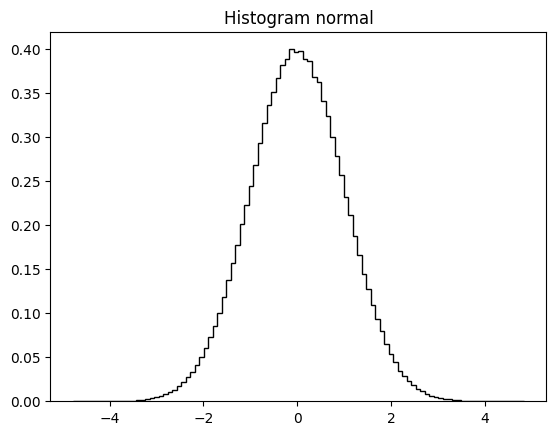

Mean: 0.0005182581747712664
Stdev: 1.000963588539125
Skewness: -0.0007974400906616205
Kurtosis: 0.009958938044694055
VaR 95%: -1.645765630625337
CVaR 95%: -2.066990902366498
Jarque-Bera: 1.3959811183466064
p-value: 0.12012146134572621
Normality: True
[ 0.74171933 -2.14066304  0.74756758 ... -0.21997546 -0.14685722
 -0.29533447]


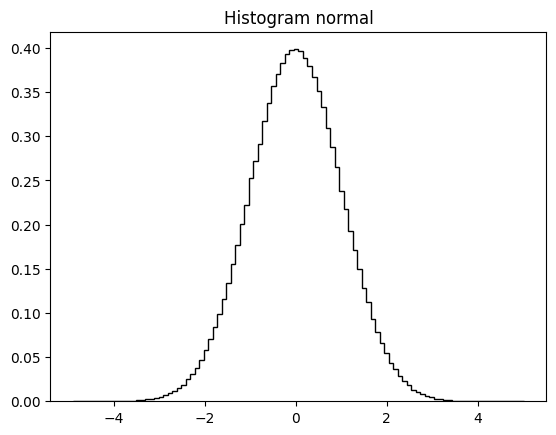

Mean: -0.000505093359267421
Stdev: 0.9996603641660444
Skewness: 0.0016941316703155528
Kurtosis: -0.0021561431289578437
VaR 95%: -1.6455475429970354
CVaR 95%: -2.0622187400307483
Jarque-Bera: 1.3959811183466064
p-value: 0.714604024770124
Normality: True
[ 2.82476504 -0.19218577  0.95367816 ...  0.65274772 -0.51658745
  0.46068828]


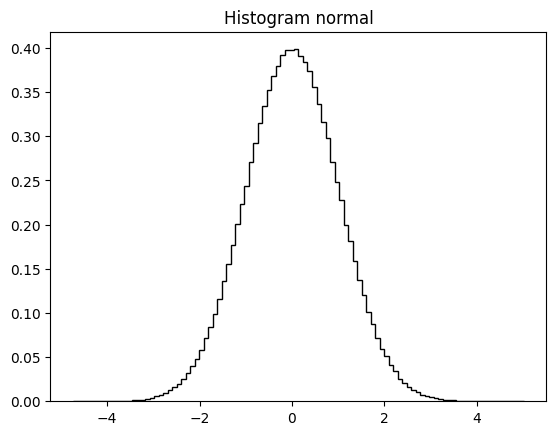

Mean: 0.0011495121505979942
Stdev: 1.0006242837819406
Skewness: 0.0005909667611365058
Kurtosis: 0.002598159319638693
VaR 95%: -1.6443637669930673
CVaR 95%: -2.0637995126850286
Jarque-Bera: 1.3959811183466064
p-value: 0.8438863305126061
Normality: True
[-0.24601675 -0.58727168 -0.94728335 ...  0.94102668  0.40001493
 -0.242497  ]


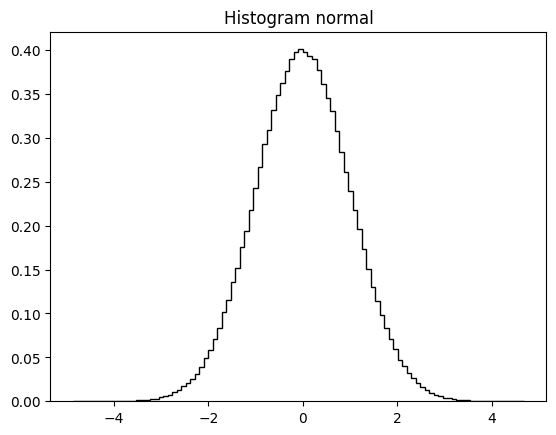

Mean: -0.00038829581467060917
Stdev: 0.9995957539382425
Skewness: 0.002797100064964247
Kurtosis: 0.004820437263057364
VaR 95%: -1.6428879770487288
CVaR 95%: -2.0614870318020952
Jarque-Bera: 1.3959811183466064
p-value: 0.3210761728410956
Normality: True
[ 0.41412239  0.68168532 -0.70921645 ... -0.68516638 -1.21255102
  1.93058199]


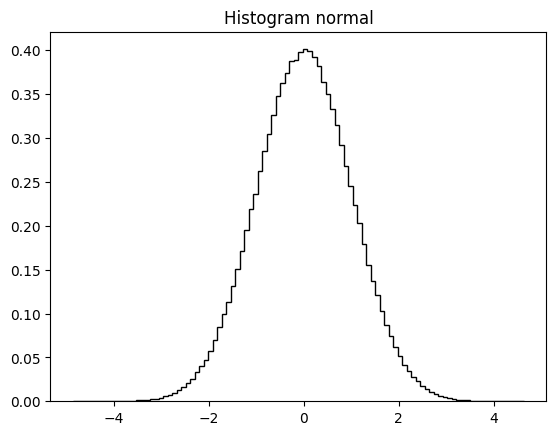

Mean: -0.0007668857412747495
Stdev: 0.9996080050352688
Skewness: 0.00020354293681459025
Kurtosis: 0.003108738979014092
VaR 95%: -1.646253747446773
CVaR 95%: -2.0630974060696405
Jarque-Bera: 1.3959811183466064
p-value: 0.8148174435959764
Normality: True
[-0.54732779  0.15201821  1.0285341  ... -0.18826505  0.5472312
 -1.54596235]


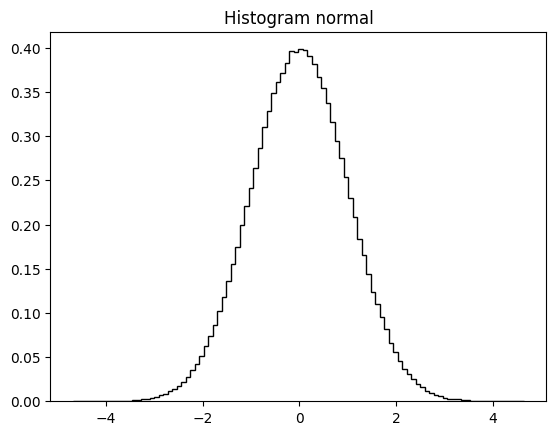

Mean: 0.0005487195669669365
Stdev: 0.9996070249948151
Skewness: 0.0033556732211104737
Kurtosis: -0.0008948425709864871
VaR 95%: -1.6416577248879005
CVaR 95%: -2.0587646653438814
Jarque-Bera: 1.3959811183466064
p-value: 0.384788781598406
Normality: True
[ 0.43840431 -0.39134468 -0.19570518 ... -0.34475789 -1.3949676
 -0.4762686 ]


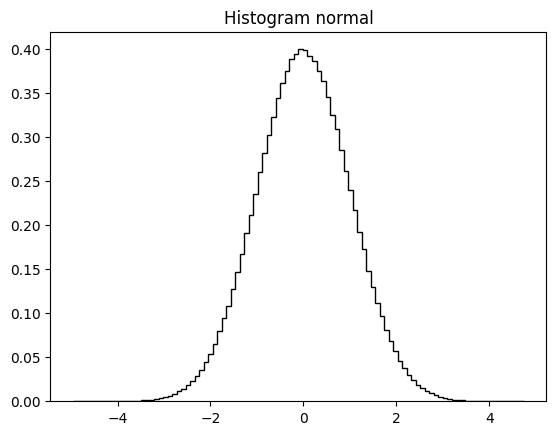

Mean: -0.001425045704086912
Stdev: 0.9996925641230012
Skewness: -0.0015118051436277791
Kurtosis: -0.005910201111543056
VaR 95%: -1.645920380894766
CVaR 95%: -2.0624811363544255
Jarque-Bera: 1.3959811183466064
p-value: 0.3992445374863455
Normality: True
[ 0.69317012  1.56147438  0.38172892 ... -0.00493437 -1.10561671
  1.7134957 ]


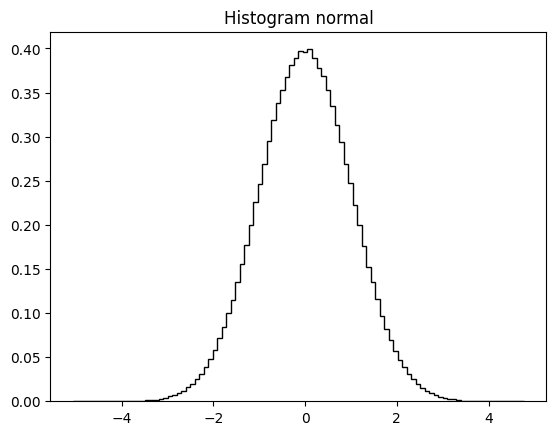

Mean: -0.0007141842526671996
Stdev: 1.0003475849102568
Skewness: -0.0030045682430719467
Kurtosis: -0.00634042053411088
VaR 95%: -1.6483992972390213
CVaR 95%: -2.065559647900181
Jarque-Bera: 1.3959811183466064
p-value: 0.2039653222173502
Normality: True
[-0.36587854  0.18269966  0.83653747 ...  2.81948994 -0.912869
  0.54107891]


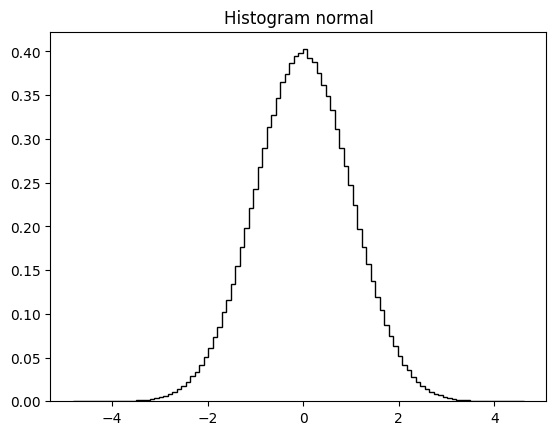

Mean: -0.0016205245773096666
Stdev: 1.0008001814997882
Skewness: -0.0009440545212091451
Kurtosis: 0.0019185514746324905
VaR 95%: -1.6480018408203057
CVaR 95%: -2.067475065241921
Jarque-Bera: 1.3959811183466064
p-value: 0.8598871895606408
Normality: True
[-1.14950781  0.50042613 -1.00547814 ... -0.09992153 -0.77897235
  0.33312595]


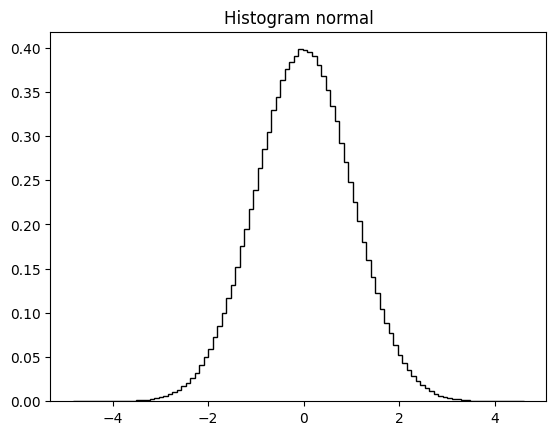

Mean: 0.0015207511659049715
Stdev: 1.000418075242944
Skewness: -0.003190481768334938
Kurtosis: -0.002081405330786268
VaR 95%: -1.645170637477966
CVaR 95%: -2.063171026513195
Jarque-Bera: 1.3959811183466064
p-value: 0.3912065245539811
Normality: True
[-1.04492304  1.7228153  -2.95576611 ... -0.89971084  0.35887072
 -1.02380952]


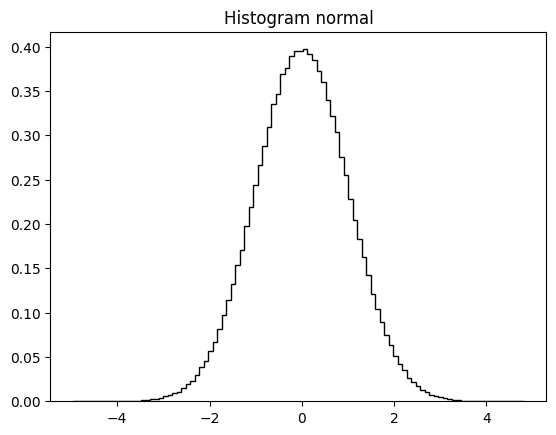

Mean: -0.00035264242653443084
Stdev: 0.9997398260531487
Skewness: 0.0025544951573062574
Kurtosis: -0.0033222950204527812
VaR 95%: -1.6427902679080055
CVaR 95%: -2.0589033976223323
Jarque-Bera: 1.3959811183466064
p-value: 0.46128553468867883
Normality: True
[ 0.85372185  1.15564282 -0.64111717 ...  0.18881899 -0.63435065
 -0.85470739]


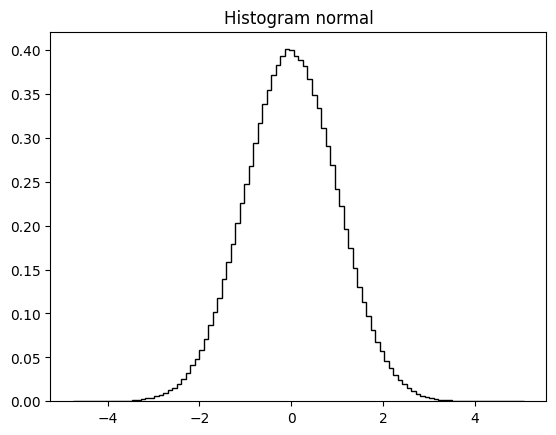

Mean: -0.001379299749947633
Stdev: 0.9999903293586296
Skewness: -0.004798382240486595
Kurtosis: 0.0006742841366333963
VaR 95%: -1.6471585636081763
CVaR 95%: -2.0664197394075576
Jarque-Bera: 1.3959811183466064
p-value: 0.14541288866419955
Normality: True
[ 1.50540498  1.6492746  -1.04351765 ... -1.28614584 -0.90542564
 -1.05421731]


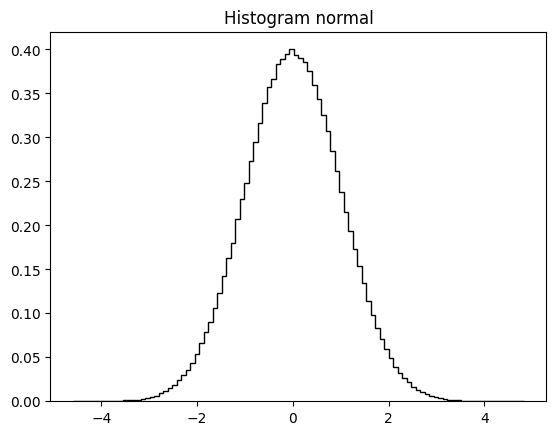

Mean: 0.0009456604874260719
Stdev: 1.0000557683197975
Skewness: 0.004505901659377051
Kurtosis: 0.004777078269854851
VaR 95%: -1.6428783208947086
CVaR 95%: -2.059708809296752
Jarque-Bera: 1.3959811183466064
p-value: 0.11447993094712139
Normality: True
[-0.31246788 -0.21347313 -0.48697671 ...  0.08517949  0.2352013
 -0.26817208]


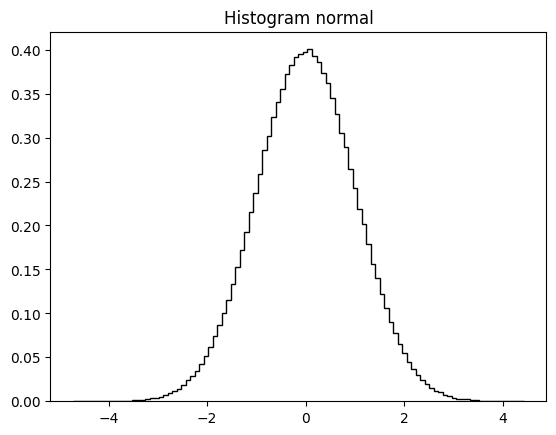

Mean: 0.001596305005538089
Stdev: 1.0000560479239045
Skewness: -0.0025166098286079973
Kurtosis: -0.007969412825405975
VaR 95%: -1.6451937884595331
CVaR 95%: -2.062904838480999
Jarque-Bera: 1.3959811183466064
p-value: 0.15709034623670082
Normality: True
[ 0.49319926 -2.42440368  0.2946839  ... -0.04754351 -0.07709779
  0.45719151]


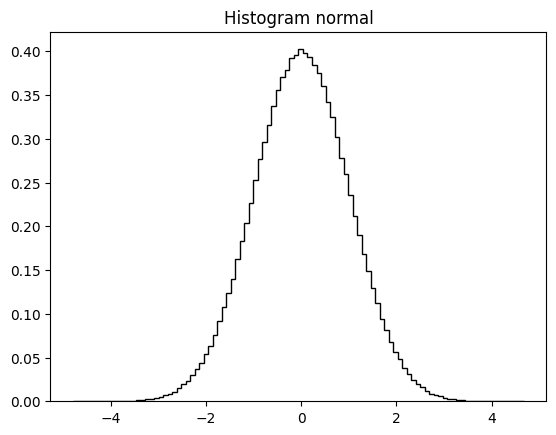

Mean: 0.0023522981185814425
Stdev: 0.9990109203039244
Skewness: -0.0050284318620585034
Kurtosis: 0.006789166286757631
VaR 95%: -1.6419800076579005
CVaR 95%: -2.0624866314666375
Jarque-Bera: 1.3959811183466064
p-value: 0.046543861989777224
Normality: False

Counter: 15


In [93]:
type_random_variable = 'normal'

is_normal = True

counter = 0

while is_normal == True:
    x = plot_hist(x_size, dof, type_random_variable)
    is_normal = JB_test(x, dof)
    counter += 1

print("")
print(f"Counter: {counter}")

It took 15 simulations to find a false negative.